# Star Wars Analysis
### (Data provided by FiveThirtyEight)
Star Wars fandom now spans almost five decades, so it is understandable that opinions on which movie is best varies highly.  However, FiveThirtyEight set out to probe if America understood that "The Empire Strikes Back" is undoubtedly the best movie of them all.  By utilizing an online survey via SurveyMonkey, they received 835 total responses, which I will clean and explore to determine if the answers back up their assertion.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
star_wars = pd.read_csv('StarWars.csv',encoding='ISO-8859-1')

**Data Dictionary**
Below are some common column categorizations and their meanings:
- **RespondentID**: An anonymized ID for the respondent (person taking the survey)
- **Gender**: The respondent's gender
- **Age**: The respondent's age
- **Household Income**: The respondent's income
- **Education**: The respondent's education level
- **Location (Census Region)**: The respondent's location
- **Have you seen any of the 6 films in the Star Wars franchise**: A *Yes* or *No* response
- **Do you consider yourself to be a fan of the Star Wars film franchise?**: A *Yes* or *No* response

In [3]:
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [4]:
print(star_wars.head(10))

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             
5  3.292731e+09                                                Yes             
6  3.292719e+09                                                Yes             
7  3.292685e+09                                                Yes             
8  3.292664e+09                                                Yes             
9  3.292654e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           

**Observations**
- After looking into the first 10 rows of the dataset, we can immediately see that there are multiple missing or null values from where the respondent chose not to answer the question.
- I will next look into the last two columns mentioned in the data dictionary as I will likely need to convert them into boolean answers.

In [5]:
print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts())
seen_null = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].isnull().sum()
print("There are {} null counts for the 'Have you seen any of the 6 films in the Star Wars franchise?' column".format(seen_null))

Yes         936
No          250
Response      1
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
There are 0 null counts for the 'Have you seen any of the 6 films in the Star Wars franchise?' column


In [6]:
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts())
film_null = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].isnull().sum()
print("There are {} null counts for the 'Do you consider yourself to be a fan of the Star Wars film franchise?' column".format(film_null))

Yes         552
No          284
Response      1
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64
There are 350 null counts for the 'Do you consider yourself to be a fan of the Star Wars film franchise?' column


**Observation**
- After finding that there is a single "Response" answer for the column, I looked into the raw data and found that the problematic response answered "The Phantom Menace" in the question "Have you seen any of the 6 films in the Star Wars franchise?" and will therefore count it as a yes for the column.  However, I will convert it as a null value for the "Do you consider yourself to be a fan of the Star Wars film franchise?".

In [7]:
six_films_bool = {
    'Yes': True,
    'No': False,
    'Response': True
}
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(six_films_bool)

fan_bool = {
    'Yes': True,
    'No':False,
}
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(fan_bool)

In [8]:
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts())

True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


In [9]:
print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts())

True     937
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64


**Column Name and Data Change**
- Now that we have converted those rows into Boolean values, I will change the column names related to each movie title into just the episode's number and convert all instances of the movie to a Boolean value as well.
    - Ex. "Star Wars: Episode I The Phantom Menace" will be converted to be just "Episode I"
    - Ex. "Unnamed: 4" will be changed to "Episode II"

In [10]:
titles = {
    'Which of the following Star Wars films have you seen? Please select all that apply.':'episode_1',
    'Unnamed: 4':'episode_2',
    'Unnamed: 5':'episode_3',
    'Unnamed: 6':'episode_4',
    'Unnamed: 7':'episode_5',
    'Unnamed: 8': 'episode_6'
}
title_answers = {
    'Star Wars: Episode I  The Phantom Menace':True,
    'Star Wars: Episode II  Attack of the Clones':True,
    'Star Wars: Episode III  Revenge of the Sith':True,
    'Star Wars: Episode IV  A New Hope':True,
    'Star Wars: Episode V The Empire Strikes Back':True,
    'Star Wars: Episode VI Return of the Jedi':True,
    np.NaN: False
}
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(title_answers)

star_wars = star_wars.rename(columns=titles)

In [11]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,episode_1,episode_2,episode_3,episode_4,episode_5,episode_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,True,NaN,True,True,True,True,True,True,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


**Cleaning Continued**
- We can see above that the respondents were asked to rank the films that they have seen on a scale of 1-6, with 1 being their most favorite and 6 being their least.
- In order to perform numeric analysis on the columns I will need to convert them to type float as they are currently strings.  The first response entry will have their titles converted to NaN as no values can be inferred.
- As I did earlier with the episode titles, I will also rename all Unnamed titles to make it easier to analyze.

In [12]:
wrong_answers = {
    'Star Wars: Episode I  The Phantom Menace':np.NaN,
    'Star Wars: Episode II  Attack of the Clones':np.NaN,
    'Star Wars: Episode III  Revenge of the Sith':np.NaN,
    'Star Wars: Episode IV  A New Hope':np.NaN,
    'Star Wars: Episode V The Empire Strikes Back':np.NaN,
    'Star Wars: Episode VI Return of the Jedi':np.NaN,
}
rank_titles = {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'episode_1_rank',
    'Unnamed: 10':'episode_2_rank',
    'Unnamed: 11':'episode_3_rank',
    'Unnamed: 12':'episode_4_rank',
    'Unnamed: 13':'episode_5_rank',
    'Unnamed: 14':'episode_6_rank',
}

star_wars.iloc[0,9:15] = star_wars.iloc[0,9:15].map(wrong_answers)
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

star_wars = star_wars.rename(columns=rank_titles)

In [13]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,episode_1,episode_2,episode_3,episode_4,episode_5,episode_6,episode_1_rank,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,True,NaN,True,True,True,True,True,True,NaN,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


<AxesSubplot:title={'center':'Mean Score per Episode'}, xlabel='Episode', ylabel='Avg. Score'>

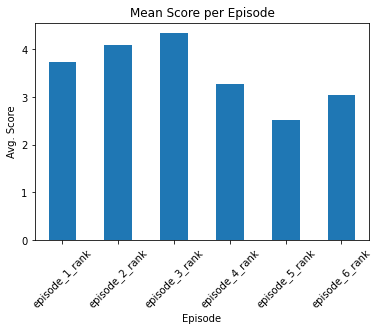

In [14]:
%matplotlib inline
means = star_wars[star_wars.columns[9:15]].mean()
means.plot(kind='bar', legend=False, xlabel='Episode',title='Mean Score per Episode', ylabel='Avg. Score', rot=45)

**Observations**
- From the graph we can determine that, just as FiveThirtyEight asserted, that "Star Wars: The Empire Strikes Back" is the best film in the franchise.  However, we should dig deeper and see if there are any factors that may be skewing the results.

<AxesSubplot:title={'center':'Total Views per Episode'}, xlabel='Episode', ylabel='Total Views'>

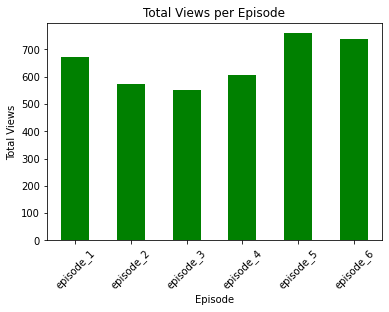

In [15]:
star_wars[star_wars.columns[3:9]].sum().plot(kind='bar',xlabel='Episode', ylabel='Total Views', rot=45, legend=False, title='Total Views per Episode', color='green')

**Observation**
- By computing the sum of the viewership of all episodes, we can determine that Episode 5 is not artificially ranked higher due to a lower proportion of viewership.

**Further Inference**
- There are three questions posed by FiveThirtyEight which will allow us to split the dataset into two subsets, gender and Star Trek fandom.
- I will separate the data based on such in order to determine if there are any differences in movie rankings.

In [16]:
sw_males = star_wars[star_wars['Gender']=='Male']
sw_females = star_wars[star_wars['Gender']=='Female']
st_fan = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?']=='Yes']
st_not_fan = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?']=='No']

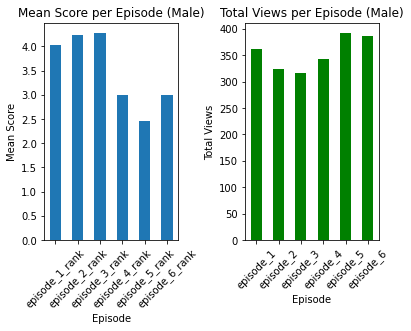

In [17]:
fig, (ax, ax2) = plt.subplots(ncols=2)
sw_males[sw_males.columns[9:15]].mean().plot(ax=ax, kind='bar', xlabel='Episode', ylabel='Mean Score', rot=45, title='Mean Score per Episode (Male)')
sw_males[sw_males.columns[3:9]].sum().plot(ax=ax2, kind='bar', xlabel='Episode', ylabel='Total Views', rot=45, color='green', title='Total Views per Episode (Male)')
plt.subplots_adjust(wspace = .5)
plt.show()

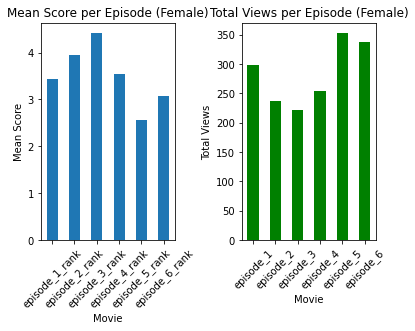

In [18]:
fig, (ax, ax2) = plt.subplots(ncols=2)
sw_females[sw_females.columns[9:15]].mean().plot(ax=ax, kind='bar', xlabel='Movie', ylabel='Mean Score', rot=45, title='Mean Score per Episode (Female)')
sw_females[sw_females.columns[3:9]].sum().plot(ax=ax2, kind='bar', xlabel='Movie', ylabel='Total Views', rot=45, color='green', title='Total Views per Episode (Female)')
plt.subplots_adjust(wspace = .5)
plt.show()

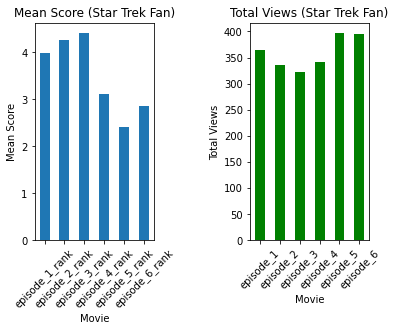

In [19]:
fig, (ax, ax2) = plt.subplots(ncols=2)
st_fan[st_fan.columns[9:15]].mean().plot(ax=ax, kind='bar', xlabel='Movie', ylabel='Mean Score', rot=45, title='Mean Score (Star Trek Fan)')
st_fan[st_fan.columns[3:9]].sum().plot(ax=ax2, kind='bar', xlabel='Movie', ylabel='Total Views', rot=45, color='green', title='Total Views (Star Trek Fan)')
plt.subplots_adjust(wspace = .8)
plt.show()

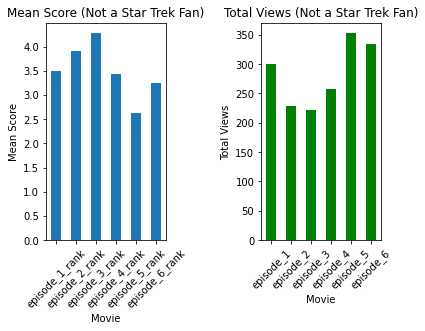

In [20]:
fig, (ax, ax2) = plt.subplots(ncols=2)
st_not_fan[st_not_fan.columns[9:15]].mean().plot(ax=ax, kind='bar', xlabel='Movie', ylabel='Mean Score', rot=45, title='Mean Score (Not a Star Trek Fan)')
st_not_fan[st_not_fan.columns[3:9]].sum().plot(ax=ax2, kind='bar', xlabel='Movie', ylabel='Total Views', rot=45, color='green', title='Total Views (Not a Star Trek Fan)')
plt.subplots_adjust(wspace = .8)
plt.show()

**Observations**
- Across all measured subsets, Star Wars Episode 5 remains the undisputed favorite regardless of gender or enjoyment of the rival series Star Trek.
- Male viewers generally seem to have higher viewership and are more critical (rank titles lower) than female viewers.
- Star Trek Fans and viewers who do not enjoy Star Trek appear to rank all titles similarly, however non-Star Trek fans have viewed far fewer of the newer Star Wars movies than Star Trek fans.